# РК ИУ5-61Б 

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_wine

In [2]:
boston = load_wine()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['TARGET'] = boston.target

In [3]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
TARGET                            int64
dtype: object

In [5]:
data.isnull().sum()
# проверим есть ли пропущенные значения

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
TARGET                          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  TARGE

In [7]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<AxesSubplot:>

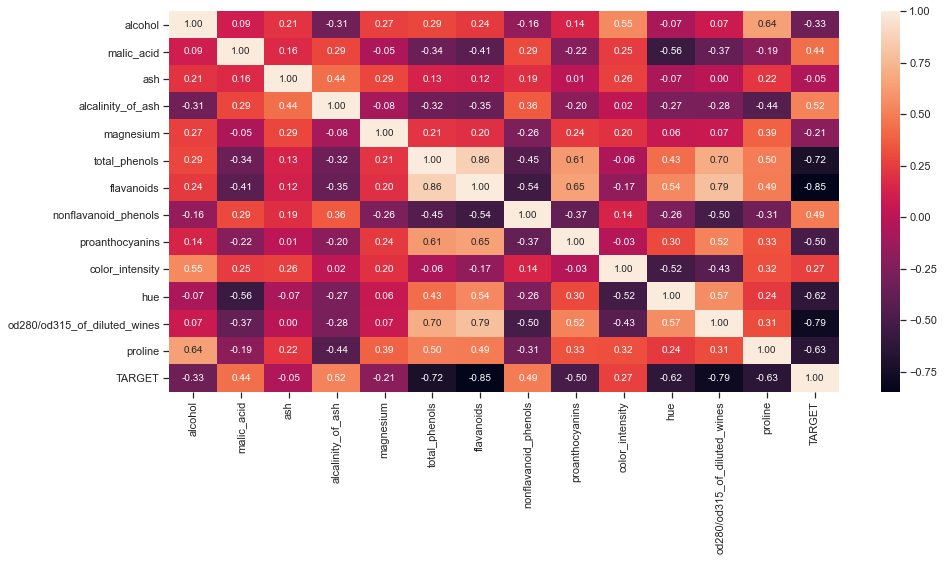

In [8]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [9]:
X = data[["od280/od315_of_diluted_wines","flavanoids"]]
Y = data.total_phenols
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    od280/od315_of_diluted_wines  flavanoids
0                          3.92        3.06
1                          3.40        2.76
2                          3.17        3.24
3                          3.45        3.49
4                          2.93        2.69 

Выходные данные:

 0    2.80
1    2.65
2    2.80
3    3.85
4    2.80
Name: total_phenols, dtype: float64


In [10]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

     od280/od315_of_diluted_wines  flavanoids
61                          1.59        1.41
51                          3.37        2.99
66                          3.18        3.18
37                          2.51        2.43
4                           2.93        2.69 

Входные параметры тестовой выборки:

      od280/od315_of_diluted_wines  flavanoids
54                           3.20        2.90
151                          1.47        1.36
63                           2.87        3.10
55                           3.03        2.78
123                          3.10        2.65 

Выходные параметры обучающей выборки:

 61    2.02
51    2.45
66    2.98
37    2.45
4     2.80
Name: total_phenols, dtype: float64 

Выходные параметры тестовой выборки:

 54     2.60
151    1.48
63     3.50
55     2.96
123    2.62
Name: total_phenols, dtype: float64


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [12]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, lr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 0.3047543388228842
Средняя квадратичная ошибка: 0.14820374105454018
Median absolute error: 0.2685484428598681
Коэффициент детерминации: 0.7608912418351534


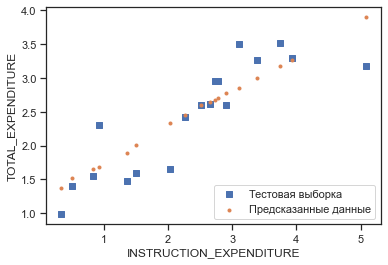

In [13]:
plt.scatter(X_test.flavanoids, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.flavanoids, lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('INSTRUCTION_EXPENDITURE')
plt.ylabel ('TOTAL_EXPENDITURE')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [16]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 0.11311111111111104
Средняя квадратичная ошибка: 0.020944888888888884
Median absolute error: 0.10799999999999976
Коэффициент детерминации: 0.9662079625218105


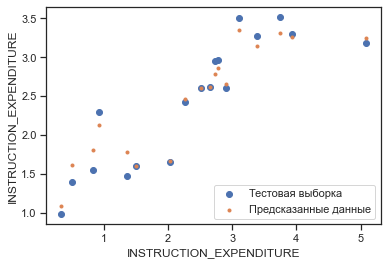

In [17]:
plt.scatter(X_test.flavanoids, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.flavanoids, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('INSTRUCTION_EXPENDITURE')
plt.ylabel('INSTRUCTION_EXPENDITURE')
plt.show()